In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
img = cv2.imread('./../../samples/imgPDF.png')
img.shape

(1770, 1270, 3)

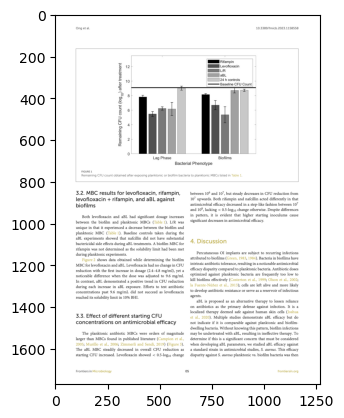

In [3]:
plt.imshow(img)

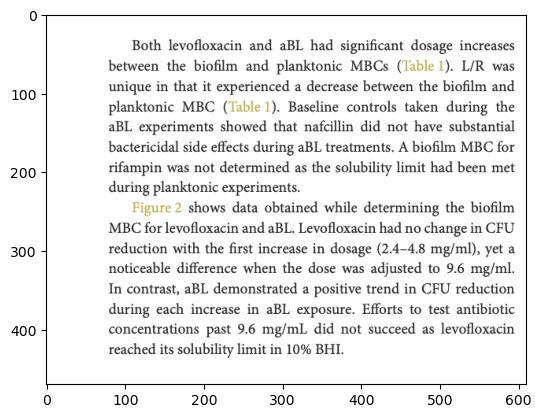

In [4]:
patch_img = img[930:1400, 20:630]
plt.imshow(patch_img)

###  thresholding

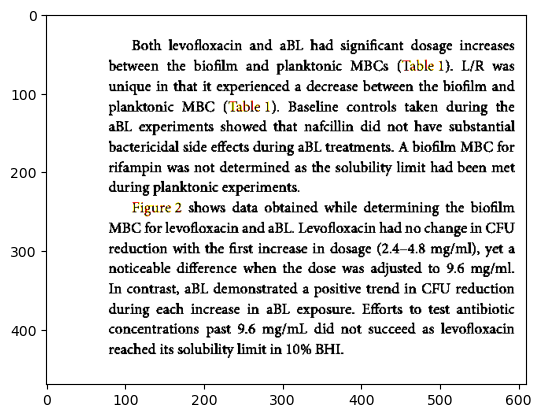

In [5]:
_,imgThresh1 = cv2.threshold(patch_img,200,255,cv2.THRESH_BINARY)
plt.imshow(imgThresh1,cmap='gray')

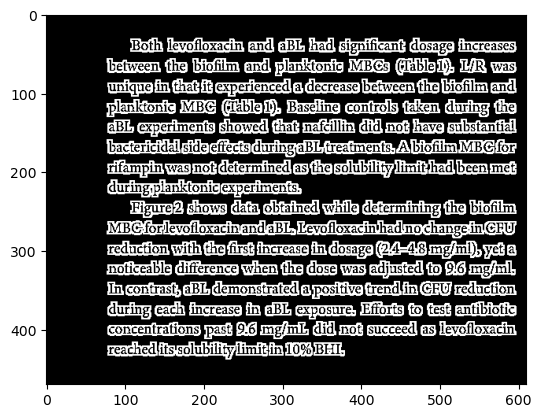

In [6]:
bs = 5
k = -0.2
maxval = 255
img1 = cv2.cvtColor(patch_img, cv2.COLOR_BGR2GRAY)
imgThresh2 = cv2.ximgproc.niBlackThreshold(img1,maxValue=maxval,
                                           type=cv2.THRESH_BINARY,blockSize=bs,k=k)
plt.imshow(imgThresh2,cmap='gray')

###  connected components

In [7]:
totalLabels, labels, stats, centroid = cv2.connectedComponentsWithStats(imgThresh2,4,cv2.CV_32S)

In [8]:
totalLabels

373

In [9]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

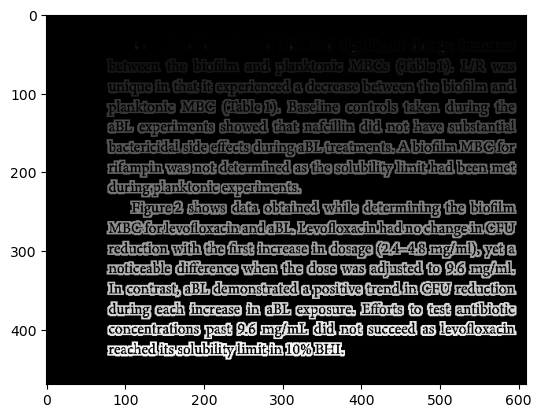

In [10]:
plt.imshow(labels,cmap='gray')

In [11]:
stats.shape

(373, 5)

In [12]:
centroid.shape

(373, 2)

(array([370.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([4.0000000e+00, 2.0875900e+03, 4.1711800e+03, 6.2547700e+03,
        8.3383600e+03, 1.0421950e+04, 1.2505540e+04, 1.4589130e+04,
        1.6672720e+04, 1.8756310e+04, 2.0839900e+04, 2.2923490e+04,
        2.5007080e+04, 2.7090670e+04, 2.9174260e+04, 3.1257850e+04,
        3.3341440e+04, 3.5425030e+04, 3.750862

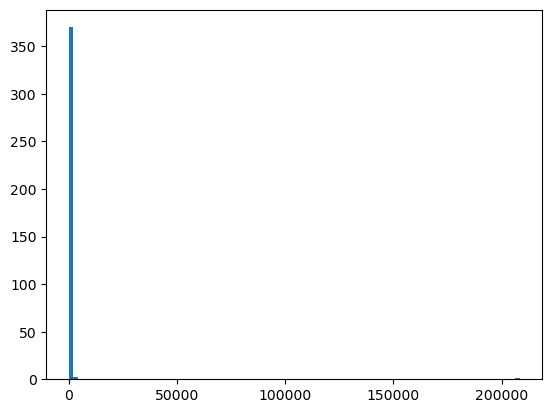

In [13]:
allAreas = stats[:,4]
plt.hist(allAreas,bins=100)

In [14]:
def preprocess(totalLabels,stats, centroids):
    #print(totalLabels,stats.shape,centroids.shape)
    columns = ['label_id', 'left','top','width','height','area','centroid_x','centroid_y']
    df = pd.DataFrame(columns=columns)
    df['label_id'] = [i for i in range(1,totalLabels+1)]
    df['left'] = stats[:,0]
    df['top'] = stats[:,1]
    df['width'] = stats[:,2]
    df['height'] = stats[:,3]
    df['area'] = stats[:,4]
    df['centroid_x'] = centroids[:,0]
    df['centroid_y'] = centroids[:,1]
    df['aspect_ratio'] = np.round(df['width']/df['height'],2)
    return df

In [15]:
comp_df = preprocess(totalLabels,stats, centroid)
comp_df.shape

(373, 9)

In [16]:
comp_df.sort_values(by=['area'])

,label_id,left,top,width,height,area,centroid_x,centroid_y,aspect_ratio
65,66,247,90,3,2,4,248.000000,90.750000,1.50
39,40,92,64,3,2,4,93.000000,64.750000,1.50
170,171,544,193,3,2,4,545.000000,193.750000,1.50
240,241,221,296,3,2,4,222.000000,296.750000,1.50
322,323,218,373,3,2,4,219.000000,373.750000,1.50
...,...,...,...,...,...,...,...,...,...
360,361,143,416,139,23,1527,212.889980,425.972495,6.04
127,128,261,159,183,23,1818,351.136414,169.869087,7.96
208,209,77,262,241,19,2401,193.225739,272.088297,12.68
209,210,319,262,279,23,2784,461.568606,272.424569,12.13


In [17]:
np.percentile(comp_df['area'],q=[10,50,70,75,80,85,90,95,99])

array([   5.  ,   24.  ,  293.  ,  329.  ,  410.4 ,  583.2 ,  674.8 ,
        893.2 , 1608.48])

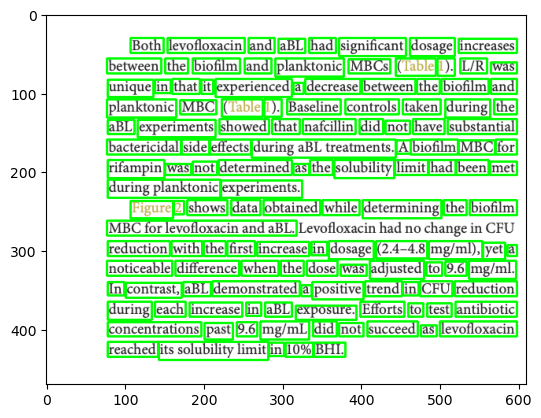

In [18]:
output = patch_img.copy() #np.zeros(img.shape)#
for i in range(1, totalLabels):
    x, y, w, h, area = stats[i]
    if area > 100 and area < 2500:
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(output)

In [19]:
comp_df.sort_values(by=['area'])[:10]['label_id'].values

array([ 66,  40, 171, 241, 323, 322, 117,  77, 113,  49])

<AxesSubplot:>

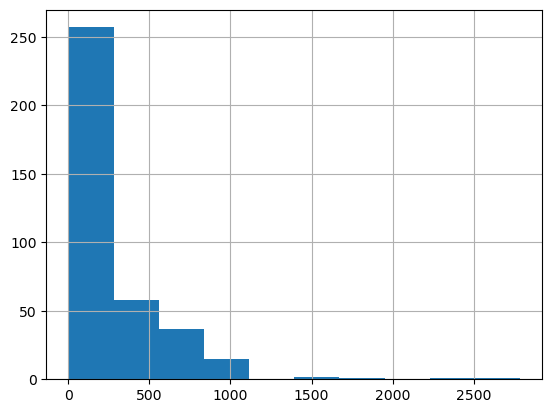

In [20]:
comp_df[comp_df['area'] < 3000]['area'].hist()

<AxesSubplot:>

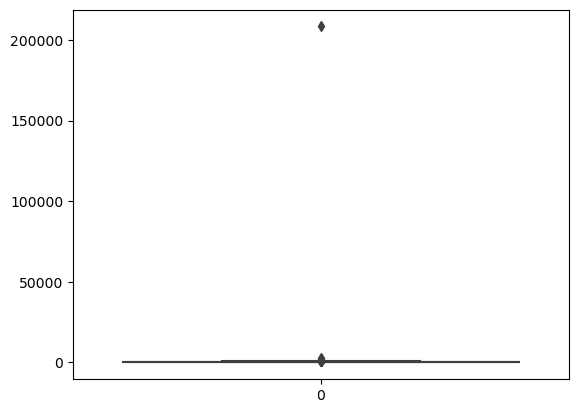

In [21]:
sns.boxplot(comp_df['area'])

In [22]:
def plot_components(df,comps=[]):
    output = patch_img.copy() 
    for comp in comps:
        x, y, w, h, area = df[df['label_id'] == comp][['left','top','width','height','area']].values[0]
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(output)

In [23]:
comp_df

,label_id,left,top,width,height,area,centroid_x,centroid_y,aspect_ratio
0,1,0,0,610,470,208363,294.908616,236.192923,1.30
1,2,107,30,42,19,388,128.515464,39.796392,2.21
2,3,154,30,98,19,937,201.500534,40.469584,5.16
3,4,257,30,33,19,324,273.197531,40.354938,1.74
4,5,295,31,34,18,329,311.088146,40.024316,1.89
...,...,...,...,...,...,...,...,...,...
368,369,124,424,3,2,5,125.200000,424.600000,1.50
369,370,132,424,4,7,22,133.818182,427.000000,0.57
370,371,177,424,4,7,24,178.500000,427.000000,0.57
371,372,333,426,2,5,10,333.500000,428.000000,0.40


In [24]:
comp_df.sort_values(by=['area'])

,label_id,left,top,width,height,area,centroid_x,centroid_y,aspect_ratio
65,66,247,90,3,2,4,248.000000,90.750000,1.50
39,40,92,64,3,2,4,93.000000,64.750000,1.50
170,171,544,193,3,2,4,545.000000,193.750000,1.50
240,241,221,296,3,2,4,222.000000,296.750000,1.50
322,323,218,373,3,2,4,219.000000,373.750000,1.50
...,...,...,...,...,...,...,...,...,...
360,361,143,416,139,23,1527,212.889980,425.972495,6.04
127,128,261,159,183,23,1818,351.136414,169.869087,7.96
208,209,77,262,241,19,2401,193.225739,272.088297,12.68
209,210,319,262,279,23,2784,461.568606,272.424569,12.13


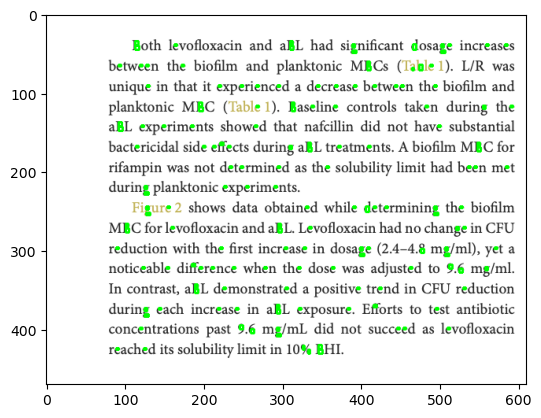

In [25]:
small = comp_df.sort_values(by=['area'])[:150]['label_id'].values
plot_components(comp_df,small)

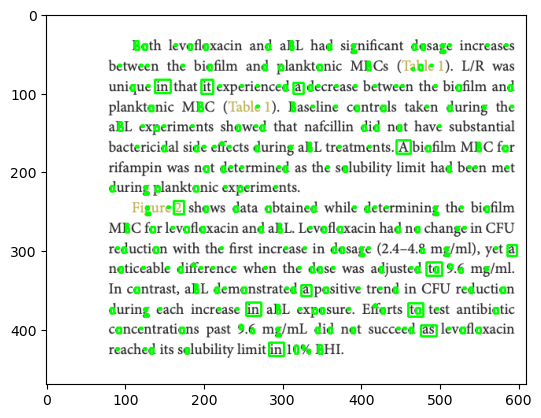

In [26]:
small = comp_df.sort_values(by=['area'])[:250]
plot_components(comp_df,small['label_id'].values)

<AxesSubplot:>

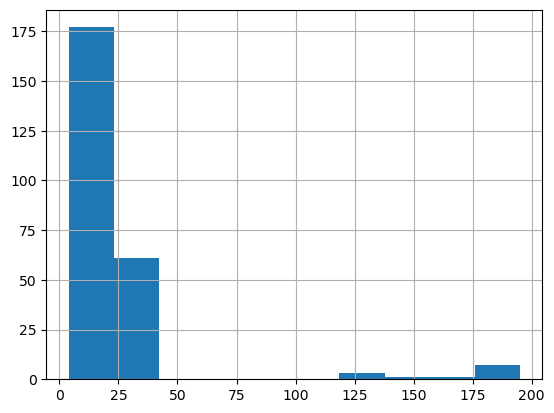

In [27]:
small['area'].hist()

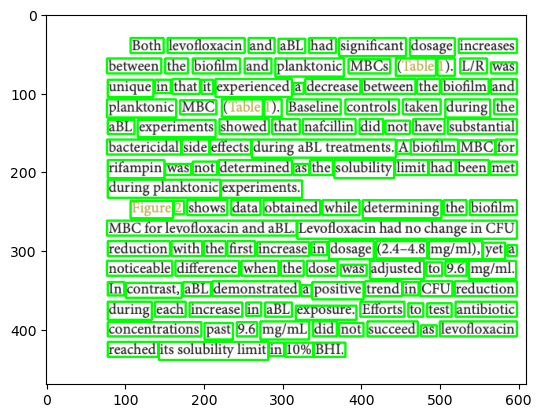

In [28]:
small = comp_df[(comp_df['area'] > 50) & (comp_df['area'] < 3000)]
plot_components(comp_df,small['label_id'].values)

In [29]:
small['label_id']

1        2
2        3
3        4
4        5
5        6
      ... 
359    360
360    361
361    362
362    363
363    364
Name: label_id, Length: 134, dtype: int64

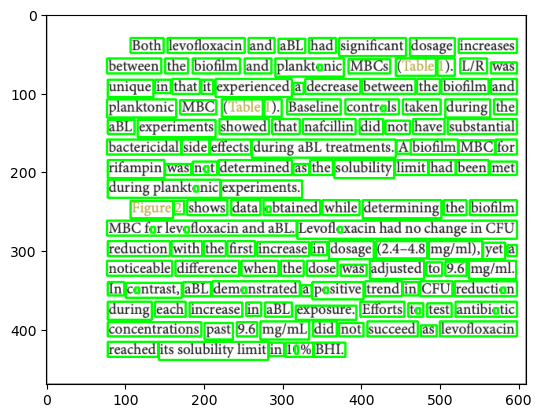

In [30]:
large = comp_df.sort_values(by=['area'],ascending=False)[:150]['label_id'].values
plot_components(comp_df,large)

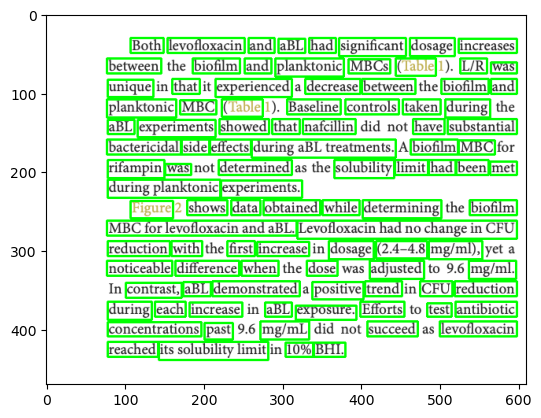

In [31]:
large = comp_df.sort_values(by=['area'],ascending=False)[1:100]
plot_components(comp_df,large['label_id'].values)

<AxesSubplot:>

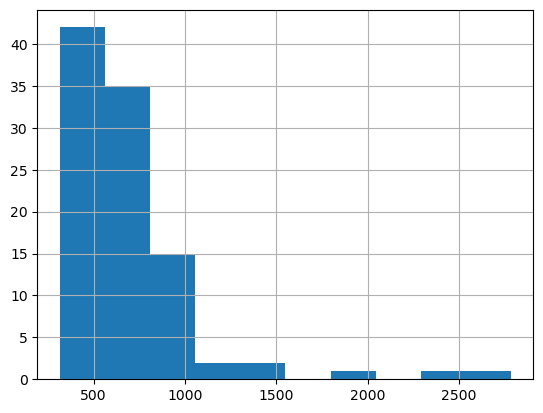

In [32]:
large['area'].hist()

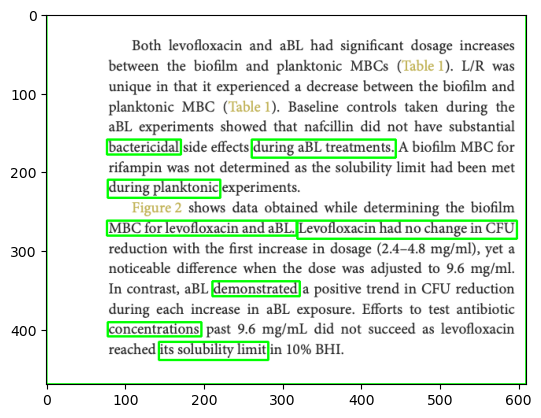

In [33]:
large = comp_df[comp_df['area'] > 1000]
plot_components(comp_df,large['label_id'].values)

In [34]:
comp_df.sort_values(by=['aspect_ratio','label_id'])

,label_id,left,top,width,height,area,centroid_x,centroid_y,aspect_ratio
364,365,316,421,4,10,35,317.542857,425.400000,0.40
365,366,326,421,2,5,9,326.444444,422.777778,0.40
371,372,333,426,2,5,10,333.500000,428.000000,0.40
13,14,181,38,4,7,24,182.500000,41.000000,0.57
14,15,201,38,4,7,24,202.500000,41.000000,0.57
...,...,...,...,...,...,...,...,...,...
172,173,78,210,143,23,1461,148.927447,220.638604,6.22
334,335,78,391,119,18,1103,137.480508,401.002720,6.61
127,128,261,159,183,23,1818,351.136414,169.869087,7.96
209,210,319,262,279,23,2784,461.568606,272.424569,12.13


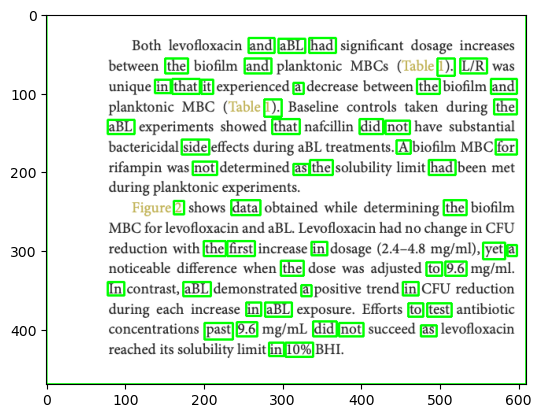

In [35]:
small = comp_df[(comp_df['aspect_ratio'] < 2) & (comp_df['area'] > 50)]
plot_components(comp_df,small['label_id'].values)

In [36]:
comp_df_filtered = comp_df[(comp_df['area'] > 50) & (comp_df['aspect_ratio'] > 2) & (comp_df['area'] < 3000)]
comp_df_filtered.shape

(81, 9)

In [37]:
comp_df_filtered.reset_index(drop=True)

,label_id,left,top,width,height,area,centroid_x,centroid_y,aspect_ratio
0,2,107,30,42,19,388,128.515464,39.796392,2.21
1,3,154,30,98,19,937,201.500534,40.469584,5.16
2,7,372,30,85,23,892,413.839686,40.659193,3.70
3,8,462,30,57,23,538,490.334572,41.392193,2.48
4,9,524,31,74,18,712,559.702247,41.122191,4.11
...,...,...,...,...,...,...,...,...,...
76,339,408,390,64,19,625,439.587200,400.977600,3.37
77,340,500,390,98,19,934,547.448608,400.460385,5.16
78,360,78,416,64,19,646,110.178019,426.411765,3.37
79,361,143,416,139,23,1527,212.889980,425.972495,6.04


In [38]:
def plot_nn_patch(df,root_label, neighbor_labels):
            
    output = patch_img.copy()
    count = 0
    x,y,w,h = df[df['label_id'] == root_label][['left','top','width','height']].values[0]  
    print(df[df['label_id'] == root_label])
    cv2.rectangle(output, (x, y), (x + w, y + h),(255,0,0) , 2)
    for neighbor in neighbor_labels:
        count += 1
        x1,y1,w1,h1 = df[df['label_id'] == neighbor][['left','top','width','height']].values[0]
        cv2.rectangle(output, (x1, y1), (x1 + w1, y1 + h1),(0, 255,0) , 2)
        cv2.putText(output, str(count), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
        #cv2.circle(output, (100, 100), 5, (255, 255, 255), -1)
    plt.imshow(output)

In [39]:
def build_single_lexicon(label_id, df, k=5):
    if label_id not in df['label_id']:
        print("unknown component")
        return
    
    #extract word-coordinates
    x,y,w,h = df[df['label_id'] == label_id][['centroid_x','centroid_y','width','height']].values[0]

    #filter candidates
    c1 = (df['centroid_x'] >= x-w) & (df['centroid_x'] <= x+w)
    c2 = (df['centroid_y'] >= y-h) & (df['centroid_y'] <= y+h)
    temp_df = df[c1 & c2]
    window = 1
    while(temp_df.shape[0] <= k):
        window += 0.5
        c1 = (df['centroid_x'] >= x-(window*w)) & (df['centroid_x'] <= x+(window*w))
        c2 = (df['centroid_y'] >= y-(window*h)) & (df['centroid_y'] <= y+(window*h))
        temp_df = df[c1 & c2]
    
    #transalation-invariance 
    temp_df['new_centroid_x'] = (temp_df['centroid_x']-x)
    temp_df['new_centroid_y'] = (y-temp_df['centroid_y'])
    
    #rotation-invariance
    
    
    #scale-invariance
    temp_df['new_centroid_x'] = temp_df['centroid_x']/w
    temp_df['new_centroid_y'] = temp_df['centroid_y']/w
    
    #calculate distance & angle
    temp_df['Euclidean'] = np.sqrt(temp_df['new_centroid_x']**2 + temp_df['new_centroid_y']**2)
    temp_df['theta'] = np.degrees(np.arctan2(temp_df['new_centroid_y'], temp_df['new_centroid_x']))
    temp_df['theta'] = (temp_df['theta'] + 360) % 360 
    temp_df.loc[temp_df['theta'] > 350, 'theta'] = 0
    temp_df.loc[temp_df['theta'] < 2, 'theta'] = 0
    
    #get k-nn
    result_df = temp_df.sort_values(by=['theta','Euclidean'])[1:k+1]
    prev_value = result_df['theta'].shift(1)
    mask = abs(result_df['theta'] - prev_value) <= 5
    result_df = result_df[~mask]
    
    #return knn
    nn = result_df[['new_centroid_x','new_centroid_x']].values
    nn_labels = result_df['label_id'].values
    return nn,nn_labels,result_df

In [41]:
comp_df_filtered

,label_id,left,top,width,height,area,centroid_x,centroid_y,aspect_ratio
1,2,107,30,42,19,388,128.515464,39.796392,2.21
2,3,154,30,98,19,937,201.500534,40.469584,5.16
6,7,372,30,85,23,892,413.839686,40.659193,3.70
7,8,462,30,57,23,538,490.334572,41.392193,2.48
8,9,524,31,74,18,712,559.702247,41.122191,4.11
...,...,...,...,...,...,...,...,...,...
338,339,408,390,64,19,625,439.587200,400.977600,3.37
339,340,500,390,98,19,934,547.448608,400.460385,5.16
359,360,78,416,64,19,646,110.178019,426.411765,3.37
360,361,143,416,139,23,1527,212.889980,425.972495,6.04


In [42]:
comp_df_filtered.label_id.values

array([  2,   3,   7,   8,   9,  29,  31,  33,  34,  35,  39,  52,  56,
        57,  58,  60,  80,  81,  82,  84,  85,  86,  87, 103, 105, 107,
       108, 110, 125, 127, 128, 129, 132, 150, 151, 153, 154, 156, 159,
       173, 174, 184, 186, 188, 189, 190, 192, 209, 210, 227, 228, 231,
       233, 234, 235, 253, 254, 255, 257, 258, 259, 263, 283, 284, 285,
       286, 288, 290, 308, 309, 310, 311, 312, 319, 335, 337, 339, 340,
       360, 361, 364])

In [ ]:
def calculate_angle_between_3_points(p1, p2, p3):
    v1 = p2 - p1
    v2 = p3 - p1

    # Calculate the dot product of the two vectors
    dot_product = np.dot(v1, v2)

    # Calculate the magnitude of the two vectors
    v1_mag = np.linalg.norm(v1)
    v2_mag = np.linalg.norm(v2)

    # Calculate the cosine of the angle between the two vectors
    cosine = dot_product / (v1_mag * v2_mag)

    # Calculate the angle in degrees
    angle = np.round(np.arccos(cosine) * 180 / np.pi,3)

    return angle


In [ ]:
p1 = np.array([0, 0])
p2 = np.array([0, 1])
p3 = np.array([1, 0])

angle = calculate_angle_between_3_points(p1, p2, p3)
print(angle)

In [ ]:
l = df[df['label_id'] == 80]
np.degrees(np.arctan2(l['centroid_y'] - l['top'], l['centroid_x'] - l['left']))

In [43]:
word = 87
df = comp_df_filtered.copy()
coordinates,labels,res = build_single_lexicon(word, df,k=10)

unknown component


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
res

In [ ]:
plot_nn_patch(df,word,labels)

In [ ]:
word = 55
df = comp_df_filtered.copy()
build_single_lexicon(word, df,k=5)

In [ ]:
word = 80
df = comp_df_filtered.copy()
build_single_lexicon(word, df,k=10,window=3)

In [ ]:
word = 30
df = comp_df_filtered.copy()
coordinates,labels,res = build_single_lexicon(word, df,k=10)

In [ ]:
plot_nn_patch(df,word,labels)

In [ ]:
comp_df_filtered['width'].hist()

In [ ]:
comp_df_filtered['width'].mean(),comp_df_filtered['width'].min(),comp_df_filtered['width'].max()

In [ ]:
comp_df_filtered['width'].quantile([.50,.75,.85,.90,.95,.99])

In [ ]:
res

In [ ]:
word = 55
df = comp_df_filtered.copy()
coordinates,labels,res = build_single_lexicon(word, df,k=10)
print(coordinates,labels)
plot_nn_patch(df,word,labels)

In [ ]:
res

In [ ]:
word = 80
coordinates,labels,res = build_single_lexicon(word, comp_df_filtered,k=10)
plot_nn_patch(comp_df_filtered,word,labels)

In [ ]:
res

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

In [ ]:
points = [1.3633327, 26.57686181, 26.38502895, 52.4705564, 51.55414576, 25.0872434, 24.42321393, 77.17042363, 50.40724629, 25.73890267]
distances = pdist(np.array(points).reshape(-1, 1))

# Initialize variables to track the best number of clusters and silhouette score
best_num_clusters = 0
best_silhouette_score = -1

# Perform hierarchical clustering and evaluate silhouette scores for different cluster numbers
for num_clusters in range(2, len(points) + 1):
    linkage_matrix = linkage(distances, method='ward')
    cluster_assignments = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(np.array(points).reshape(-1, 1), cluster_assignments)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_clusters = num_clusters

# Perform clustering with the best number of clusters
linkage_matrix = linkage(distances, method='ward')
cluster_assignments = fcluster(linkage_matrix, best_num_clusters, criterion='maxclust')

# Print cluster assignments for each point
for i, point in enumerate(points):
    print(f"Point {i+1} belongs to Cluster {cluster_assignments[i]} (Best number of clusters: {best_num_clusters})")
